In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 491 kB/s 
     |████████████████████████████████| 189 kB 31.2 MB/s 
     |████████████████████████████████| 1.2 MB 29.1 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 332 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

# Your Deep Learning Journey

## Deep Learning Is for Everyone

## Neural Networks: A Brief History

## Who We Are

## How to Learn Deep Learning

### Your Projects and Your Mindset

## The Software: PyTorch, fastai, and Jupyter

## Your First Model

### Getting a GPU Deep Learning Server

### Running Your First Notebook

In [3]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.168450,0.024254,0.006766,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.050769,0.025079,0.007442,02:22


### Sidebar: This Book Was Written in Jupyter Notebooks

In [4]:
1+1

2

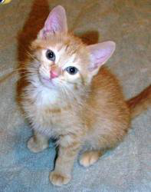

In [5]:
img = PILImage.create(image_cat())
img.to_thumb(192)

### End sidebar

In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [7]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [7]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


### What Is Machine Learning?

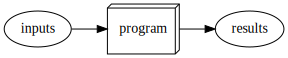

In [8]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

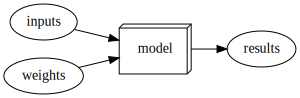

In [9]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

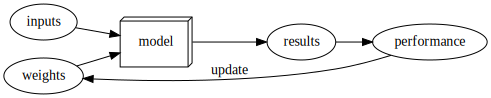

In [10]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

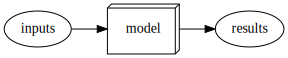

In [11]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### What Is a Neural Network?

### A Bit of Deep Learning Jargon

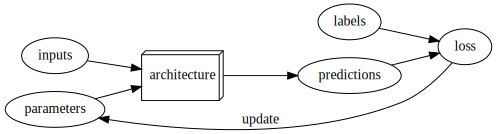

In [12]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

Generally speaking, we've seen that most organizations that say they don't have enough data, actually mean they don't have enough *labeled* data. If any organization is interested in doing something in practice with a model, then presumably they have some inputs they plan to run their model against. And presumably they've been doing that some other way for a while (e.g., manually, or with some heuristic program), so they have data from those processes! For instance, a radiology practice will almost certainly have an archive of medical scans (since they need to be able to check how their patients are progressing over time), but those scans may not have structured labels containing a list of diagnoses or interventions (since radiologists generally create free-text natural language reports, not structured data). We'll be discussing labeling approaches a lot in this book, because it's such an important issue in practice.

Since these kinds of machine learning models can only make *predictions* (i.e., attempt to replicate labels), this can result in a significant gap between organizational goals and model capabilities. For instance, in this book you'll learn how to create a *recommendation system* that can predict what products a user might purchase. This is often used in e-commerce, such as to customize products shown on a home page by showing the highest-ranked items. But such a model is generally created by looking at a user and their buying history (*inputs*) and what they went on to buy or look at (*labels*), which means that the model is likely to tell you about products the user already has or already knows about, rather than new products that they are most likely to be interested in hearing about. That's very different to what, say, an expert at your local bookseller might do, where they ask questions to figure out your taste, and then tell you about authors or series that you've never heard of before.

### How Our Image Recognizer Works

### What Our Image Recognizer Learned

### Image Recognizers Can Tackle Non-Image Tasks

### Jargon Recap

## Deep Learning Is Not Just for Image Classification

In [13]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.656825,2.262180,00:04


epoch,train_loss,valid_loss,time
0,1.822231,1.784572,00:04
1,1.585925,1.557402,00:04
2,1.423988,1.143978,00:04
3,1.299716,1.165522,00:04
4,1.187097,0.951599,00:04
5,1.082036,0.871749,00:04
6,0.990278,0.804826,00:04
7,0.917793,0.799825,00:04


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


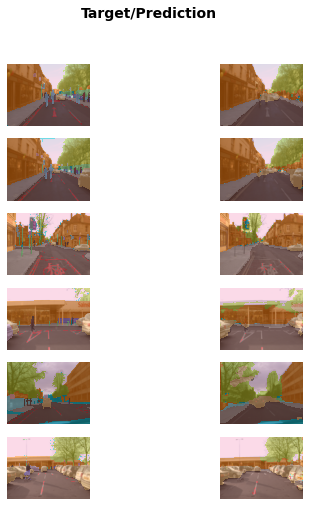

In [14]:
learn.show_results(max_n=6, figsize=(7,8))

In [15]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.452684,0.391057,0.826840,07:55


epoch,train_loss,valid_loss,accuracy,time
0,0.303298,0.314332,0.862080,15:23
1,0.246233,0.213452,0.919680,15:20
2,0.189061,0.210693,0.921120,15:22
3,0.150003,0.198278,0.928040,15:32


If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

In [16]:
learn.predict("I really liked that movie!")

('pos', TensorText(1), TensorText([5.8838e-04, 9.9941e-01]))

### Sidebar: The Order Matters

### End sidebar

In [17]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371330,0.363359,0.832770,00:06
1,0.362690,0.350529,0.836916,00:06
2,0.350352,0.344645,0.838759,00:06


In [19]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.502626,1.436104,00:01


epoch,train_loss,valid_loss,time
0,1.354461,1.375152,00:00
1,1.248513,1.186878,00:00
2,1.005707,0.874296,00:00
3,0.795088,0.737238,00:00
4,0.682730,0.704470,00:00
5,0.642642,0.695310,00:00
6,0.620968,0.690554,00:00
7,0.615781,0.689420,00:00
8,0.602483,0.688677,00:00
9,0.611634,0.688576,00:00


In [20]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,26.0,4.5,4.054209
1,8.0,90.0,3.0,4.375954
2,81.0,2.0,3.5,3.326896
3,48.0,25.0,2.0,3.777259
4,83.0,67.0,4.0,3.927464
5,33.0,97.0,4.0,3.907926
6,27.0,9.0,4.0,3.546902
7,45.0,38.0,2.0,3.315236
8,38.0,7.0,5.0,4.670257


### Sidebar: Datasets: Food for Models

### End sidebar

## Validation Sets and Test Sets

### Use Judgment in Defining Test Sets

## A _Choose Your Own Adventure_ moment

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

1. Do you need these for deep learning?

   - Lots of math T / **F**
   - Lots of data T / **F**
   - Lots of expensive computers T / **F**
   - A PhD T / **F**
   
2. Name five areas where deep learning is now the best in the world.

<table>
  <tr>
    <td>NLP</td>
    <td></td>
  </tr>
  <tr>
    <td>Computer vision</td>
    <td>satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles</td>
  </tr>
  <tr>
    <td>Medicine</td>
    <td>finding anomalies in radiology images, including CT, MRI, and x-ray; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy</td>
  </tr>
  <tr>
    <td>Biology</td>
    <td>folding proteins; classifying proteins; many genomics tasks, such as timor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions</td>
  </tr>
  <tr>
    <td>Image generation</td>
    <td>colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists</td>
  </tr>
  <tr>
    <td>Recommendation systems</td>
    <td>web search; product recommendations; home page layout</td>
  </tr>
  <tr>
    <td>Playing games</td>
    <td>better than humans and better than any other computer algorithm at Chess, Go, most Atari games, many real-time strategy games</td>
  </tr>
  <tr>
    <td>Robotics</td>
    <td>handling objects that are challenging to locate (e.g., transparent, shiny, lack of texture) or hard to pick up</td>
  </tr>
  <tr>
    <td>Other applications</td>
    <td>financial and logistical forecasting; text to speech; much much more…</td>
  </tr>
</table>

3. What was the name of the first device that was based on the principle of the artificial neuron?

In 1943 Warren McCulloch and Walter Pitts developed a mathematical model of an artificial neutron.  In the 1950’s Frank Rosenblatt created a machine, the **Mark I Perceptron** at Cornell that he felt would be capable of perceiving, recognizing and identifying its surroundings without any human training or control.

4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?

processing units, state of activation, output function, pattern of connectivity, propagation rule, activation rule, learning rule, environment

Modern machine learning still using these same building blocks as described in the 1986 book just differing in the choices of these different pieces.

5. What were the two theoretical misunderstandings that held back the field of neural networks?

People paid attention to the idea that simple mathematical functions (like XOR) couldn’t be represented in a single layer perceptron as shown in the paper by Minsky and Papert and largely ignored that these limitations could be addressed through the use of multiple layers.  In theory, just adding one extra layer would be enough for many mathematical models to be approximated but in practice this would result in networks too slow to be useful with computing power from the 1980s.  In practice, much more layers are needed to get practical good performance (was shown in the 1950s).  We are now seeing potential realized with improvements in hardware, increases in data availability and algorithmic advancements.

6. What is a GPU?

Graphics Processing Unit

7. Open a notebook and execute a cell containing: `1+1`. What happens?

`2`

8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
9. Complete the Jupyter Notebook online appendix.
10. Why is it hard to use a traditional computer program to recognize images in a photo?

It's very difficult (at best) to distill this type of problem to a set of manually defined instructions.  Typical problems solved with programming are solved by coming up with the sequence of instructions needed to complete the task.  Problems like image classification are not only more intricate than many typical programming tasks when thought of in this manner, but our way of structuring the problem in our head is less obvious to us and more subconscious than conscious.

11. What did Samuel mean by "weight assignment"?

The output wouldn't only depend on the inputs (say board position in checkers) but some weights to apply to those inputs through a model to generate the results.  If one could measure the performance of the system using those weights and automatically update weights to maximize maximize performance.  Weight assignment is the particular value assigned to each of these weight variables often obtained via an automatic/iterative updating procedure gradually moving towards choosing weights that maximize system performance.

12. What term do we normally use in deep learning for what Samuel called "weights"?

parameters

13. Draw a picture that summarizes Samuel's view of a machine learning model.

```
┌───────┐
│inputs ├─┐
└───────┘ │  ┌───────┐
          │  │       │ ┌──────────┐ ┌──────────────┐
          ├──► model ├─► results ├─► performance  │
┌───────┐ │  │       │ └──────────┘ └────────┬─────┘
│weights├─┘  └───────┘                       │
└───┬───┘                                    │
    │                                        │
    │                update                  │
    └────────────────────────────────────────┘
```
Tool used: [asciiflow](https://asciiflow.com/)

14. Why is it hard to understand why a deep learning model makes a particular prediction?
15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?

universal approximation theorem

16. What do you need in order to train a model?

- A model cannot be created without data
- A model can only learn to operate on the patterns seen in the input data used to train it
- This learning approach only creates predictions, not recommended actions
- It's not enough to just have examples of input data; we need labels for the ata too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs and which are cats) <-- true for *supervised learning*

A general way to update the weights of a neural network to make it improve at any given task.  Stochastic Gradient Descent (SGD).

17. How could a feedback loop impact the rollout of a predictive policing model?

- A predictive policing model created based on where arrests have been made in the past.  Will already reflect biases in existing policing processes.
- Law enforcement officers may use that model to decide to focus their activities in those areas, resulting in increased arrests in those areas.
- Those additional arrests would feed back into re-training future versions of the models.
- Creating positive feedback loop, resulting in more biased data and more biased results from each iteration of the model as the result.

18. Do we always have to use 224×224-pixel images with the cat recognition model?

The data loader will resize images to 224x224 but that size image must be given as input to the actual model.  However, a similar model could be retrained to work on larger images likely providing better accuracy at the expense of time and memory.

19. What is the difference between classification and regression?

- classification: predict a discrete value (e.g., select a class something belongs to)
- regression: predict a continuous numeric value (e.g., predict tomorrow's temperature given today's temperature)

20. What is a validation set? What is a test set? Why do we need them?

If you train for too long with not enough data you will see the accuracy of the model start to get worse (on previously unseen data, despite typically having lower loss on the training set).  This is called **over-fitting**.  The best way to know if the model is a proper fit is to save some data to test the model with that it has not been trained on.  Thus, the dataset used to build the model will be split into a training set and a validation set where the validation set is never used to modify the weights of the network but only used to see how it does on the unseen data.

In realistic scenarios, we rarely build and train a single model when attempting to solve a task.  Instead, we likely explore many different model architectures, various learning rates, data augmentation strategies, etc.  We then may guide our search and select the best one based on how a given model performed on the validation set.  This sets up a parallel problem of manually overfitting via architecture search to the validation set.  Thus we sometimes set up a more highly reserved test set that we don't use when performing our architecture search.

21. What will fastai do if you don't provide a validation set?

It will automatically create one for you.

22. Can we always use a random sample for a validation set? Why or why not?

"To do a good job of defining a validation set (and possibly a test set), you will sometimes want to do more than just randomly grab a fraction of your original dataset. Remember: a key property of the validation and test sets is that they must be representative of the new data you will see in the future."

23. What is overfitting? Provide an example.

Overfitting is when we train too long given our dataset and model architecture and start to improve our performance on the training data at the expense of being able to generalize to previously unseen data.  The model begins to behave more like it is memorizing the training set as opposed to learning useful features that will work well in the given domain in general.

Overfitting is often identified when looking at the validation accuracy every training epoch.  While training, the training loss and validation loss should both improve for the initial epochs.  At some point, validation loss will begin to increase.  Eventually, this will cause the evaluation metric on the validation set to increase as well (this may not happen at the exact same epoch - it is possible for the validation loss to increase while the validation metric is still improving).  At this point the model is beginning to overfit to the training data in a negative way.

As an example, assume some noisy data that can be physically represented with a linear relationship.  Overfitting may produce a higher order polynomial to help model the noise in the training data as opposed to finding a closer to linear relationship that will better represent the data yet to be seen.

24. What is a metric? How does it differ from "loss"?

"A metric is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each epoch."

"The concept of a metric may remind you of loss, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do. At times, you might decide that the loss function is a suitable metric, but that is not necessarily the case."

A good loss function is one that when you change the parameters a little bit up or down the loss gets a little bit better or worse.  Error/accuracy sometimes doesn't tell you that at all.  It's very possible that the changes in weights don't actually move enough to change any predictions yeilding no information for the model to adapt if used as a loss function.

25. How can pretrained models help?

"A model that has weights that have already been trained on some other dataset is called a pretrained model. You should nearly always use a pretrained model, because it means that your model, before you've even shown it any of your data, is already very capable. And, as you'll see, in a deep learning model many of these capabilities are things you'll need, almost regardless of the details of your project. For instance, parts of pretrained models will handle edge, gradient, and color detection, which are needed for many tasks."

26. What is the "head" of a model?

"When using a pretrained model, cnn_learner will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the head."

27. What kinds of features do the early layers of a CNN find? How about the later layers?

Early layers capture simple structures (oriented lines and gradients for layer 1, corners, repeated lines, circles and other simple structures for layer 2).  Later layers represent higher-level task-specific components (faces, wheels, etc).  As a result, when performing transfer learning to use a model on a different task these later layers are often stripped and replaced with random weights and retrained for the new task.

28. Are image models only useful for photos?

"An image recognizer can, as its name suggests, only recognize images. But a lot of things can be represented as images, which means that an image recogniser can learn to complete many tasks."

"For instance, a sound can be converted to a spectrogram, which is a chart that shows the amount of each frequency at each time in an audio file."

"A time series can easily be converted into an image by simply plotting the time series on a graph."

Many more fascinating examples given.  New to me.  Looking forward to revisiting for inspiration!

29. What is an "architecture"?

The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to

30. What is segmentation?

"Creating a model that can recognize the content of every individual pixel in an image is called segmentation"

31. What is `y_range` used for? When do we need it?

Used in regression tasks, `y_range` defines the range of the target variable (i.e., movie ratings are in the range $[0.5,5]$ is equivalent to `y_range=(0.5,5.5)`).

32. What are "hyperparameters"?

"in realistic scenarios we rarely build a model just by training its weight parameters once. Instead, we are likely to explore many versions of a model through various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors we will discuss in upcoming chapters. Many of these choices can be described as choices of hyperparameters. The word reflects that they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters."

33. What's the best way to avoid failures when using AI in an organization?

"Having two levels of "reserved data"—a validation set and a test set, with one level representing data that you are virtually hiding from yourself—may seem a bit extreme. But the reason it is often necessary is because models tend to gravitate toward the simplest way to do good predictions (memorization), and we as fallible humans tend to gravitate toward fooling ourselves about how well our models are performing. The discipline of the test set helps us keep ourselves intellectually honest. That doesn't mean we always need a separate test set—if you have very little data, you may need to just have a validation set—but generally it's best to use one if at all possible.
This same discipline can be critical if you intend to hire a third party to perform modeling work on your behalf. A third party might not understand your requirements accurately, or their incentives might even encourage them to misunderstand them. A good test set can greatly mitigate these risks and let you evaluate whether their work solves your actual problem.
To put it bluntly, if you're a senior decision maker in your organization (or you're advising senior decision makers), the most important takeaway is this: if you ensure that you really understand what test and validation sets are and why they're important, then you'll avoid the single biggest source of failures we've seen when organizations decide to use AI. For instance, if you're considering bringing in an external vendor or service, make sure that you hold out some test data that the vendor never gets to see. Then you check their model on your test data, using a metric that you choose based on what actually matters to you in practice, and you decide what level of performance is adequate. (It's also a good idea for you to try out some simple baseline yourself, so you know what a really simple model can achieve. Often it'll turn out that your simple model performs just as well as one produced by an external "expert"!)"

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.